In [1]:
# import dependencies
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time



In [2]:
# create a list of latitudes and Longitudes and zip them
lat=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lat,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-52.64112588479297, 107.07622361635669),
 (-6.492778766536489, 175.07214907705458),
 (-20.859279227148477, -115.91363795176694),
 (-53.189332609861026, -101.82497603624726),
 (65.07254219821556, -59.825701584855565),
 (-11.806092034674165, 83.69746442078025),
 (57.45560215849588, -103.1300951596586),
 (23.053161402146472, -7.8733117562027815),
 (25.4096570028111, 75.72844869017271),
 (-23.31635124187187, -161.38973521343408),
 (52.109592735565826, -21.785771210032152),
 (36.876946372765445, 108.06828992470821),
 (-9.27322301724665, 10.903614551430621),
 (72.6146956061576, 145.31975687929832),
 (-88.92349722987043, 68.62873306986174),
 (49.310657286715866, 12.556278588666657),
 (62.904760343682625, -121.92213343939218),
 (83.82818489744207, -35.169928956642366),
 (59.378973836339554, 43.495208493525524),
 (27.234415873183465, -136.0211573064314),
 (-87.81035985977614, 69.22578004789946),
 (59.314806555393034, 126.39915961318053),
 (-14.343738802282644, -45.1113814175001),
 (-16.549251

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [6]:
cities

['albany',
 'lolua',
 'rikitea',
 'castro',
 'pangnirtung',
 'hithadhoo',
 'flin flon',
 'taoudenni',
 'bundi',
 'avarua',
 'vestmannaeyjar',
 'yanan',
 'luanda',
 'chokurdakh',
 'taolanaro',
 'roding',
 'fort nelson',
 'tasiilaq',
 'imeni babushkina',
 'pacific grove',
 'tommot',
 'correntina',
 'port alfred',
 'punta arenas',
 'kavieng',
 'cidreira',
 'port blair',
 'santa cruz de la palma',
 'roma',
 'atuona',
 'karasjok',
 'qaanaaq',
 'illoqqortoormiut',
 'mayahi',
 'saint-georges',
 'anqing',
 'hilo',
 'souillac',
 'burnie',
 'hobart',
 'astoria',
 'kapaa',
 'batagay',
 'pitimbu',
 'arraial do cabo',
 'mataura',
 'kawanoe',
 'saint anthony',
 'klaksvik',
 'sorland',
 'kyzyl-suu',
 'nikolskoye',
 'bethel',
 'khatanga',
 'rebrikha',
 'wulanhaote',
 'samusu',
 'ushuaia',
 'hvolsvollur',
 'mar del plata',
 'adelanto',
 'chuy',
 'thompson',
 'east london',
 'vila franca do campo',
 'upernavik',
 'carnarvon',
 'lebu',
 'bilibino',
 'tuktoyaktuk',
 'constitucion',
 'lorengau',
 'huarmey'

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Starting URL for Weather Map API Call.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e0321ca41a7cfb548ec58b2953f7ca66


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | lolua
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | taoudenni
Processing Record 9 of Set 1 | bundi
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | yanan
City not found. Skipping...
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | roding
Processing Record 17 of Set 1 | fort nelson
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | imeni babushkina
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | tommot
Processing Record 22 of Set 1 | correntina
Processing R

Processing Record 39 of Set 4 | am timan
Processing Record 40 of Set 4 | ambon
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | kinsale
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | varazdin
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | wanlaweyn
Processing Record 47 of Set 4 | yangambi
Processing Record 48 of Set 4 | fethiye
Processing Record 49 of Set 4 | beloha
Processing Record 50 of Set 4 | naron
Processing Record 1 of Set 5 | niono
Processing Record 2 of Set 5 | thanh hoa
Processing Record 3 of Set 5 | qaqortoq
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | pavlogradka
Processing Record 8 of Set 5 | maniitsoq
Processing Record 9 of Set 5 | rawson
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | maceio
Proc

Processing Record 27 of Set 8 | burkhala
City not found. Skipping...
Processing Record 28 of Set 8 | bilma
Processing Record 29 of Set 8 | san quintin
Processing Record 30 of Set 8 | maymyo
Processing Record 31 of Set 8 | ust-kuyga
Processing Record 32 of Set 8 | stoilesti
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | ihosy
Processing Record 35 of Set 8 | isangel
Processing Record 36 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 8 | sagauli
Processing Record 38 of Set 8 | bon accord
Processing Record 39 of Set 8 | upington
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | nagato
Processing Record 42 of Set 8 | basoko
Processing Record 43 of Set 8 | cochrane
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | maragogi
Processing Record 46 of Set 8 | mount isa
Processing Record 47 of Set 8 | dubbo
Processing Record 48 of Set 8 | sartana
Processing Record 49 of Set 8 | perico
Process

Processing Record 12 of Set 12 | bako
Processing Record 13 of Set 12 | ha giang
Processing Record 14 of Set 12 | kourou
Processing Record 15 of Set 12 | gua musang
Processing Record 16 of Set 12 | barmer
Processing Record 17 of Set 12 | praia
Processing Record 18 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 19 of Set 12 | la sarre
Processing Record 20 of Set 12 | carlsbad
Processing Record 21 of Set 12 | alugan
Processing Record 22 of Set 12 | aflu
City not found. Skipping...
Processing Record 23 of Set 12 | anchorage
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | artvin
Processing Record 27 of Set 12 | manoel urbano
Processing Record 28 of Set 12 | doka
Processing Record 29 of Set 12 | naters
Processing Record 30 of Set 12 | kenitra
Processing Record 31 of Set 12 | dinsor
City not found. Skipping...
Processing Record 32 of Set 12 | tuatapere
Processing Record 33 of Set 12 | bandarbeyla
Proces

In [10]:
# Lenght of City Data dictionary
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,43.00,32,20,13.87,US,2020-02-22 18:45:32
1,Rikitea,-23.12,-134.97,77.94,72,10,5.06,PF,2020-02-22 18:49:29
2,Castro,-24.79,-50.01,71.71,79,92,3.91,BR,2020-02-22 18:50:00
3,Pangnirtung,66.15,-65.71,-31.00,59,20,2.24,CA,2020-02-22 18:49:48
4,Hithadhoo,-0.60,73.08,82.02,80,100,12.08,MV,2020-02-22 18:49:41


In [12]:
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-02-22 18:45:32,42.60,-73.97,43.00,32,20,13.87
1,Rikitea,PF,2020-02-22 18:49:29,-23.12,-134.97,77.94,72,10,5.06
2,Castro,BR,2020-02-22 18:50:00,-24.79,-50.01,71.71,79,92,3.91
3,Pangnirtung,CA,2020-02-22 18:49:48,66.15,-65.71,-31.00,59,20,2.24
4,Hithadhoo,MV,2020-02-22 18:49:41,-0.60,73.08,82.02,80,100,12.08


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
#today = time.time()
today=time.strftime("%x")
today

'02/22/20'

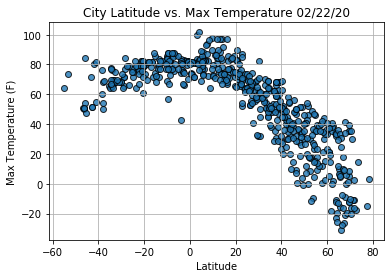

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

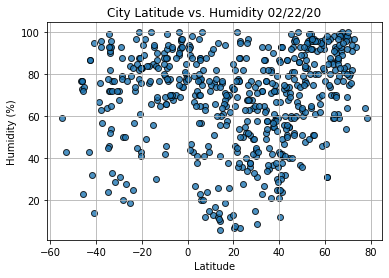

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

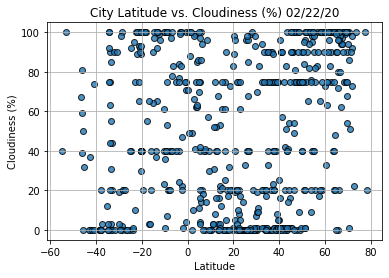

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

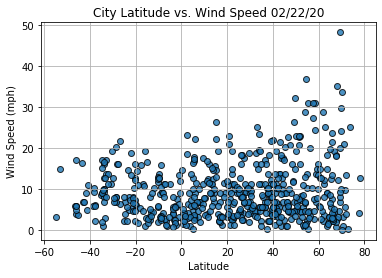

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
 # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [21]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-02-22 18:45:32,42.60,-73.97,43.00,32,20,13.87
1,Rikitea,PF,2020-02-22 18:49:29,-23.12,-134.97,77.94,72,10,5.06
2,Castro,BR,2020-02-22 18:50:00,-24.79,-50.01,71.71,79,92,3.91
3,Pangnirtung,CA,2020-02-22 18:49:48,66.15,-65.71,-31.00,59,20,2.24
4,Hithadhoo,MV,2020-02-22 18:49:41,-0.60,73.08,82.02,80,100,12.08
